In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [66]:
df = pd.read_csv('datasets/titanic_toy.csv')

In [67]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [69]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [70]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [73]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [74]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [75]:
mean_age, median_age, mean_fare, median_fare

(29.78590425531915, 28.75, 32.61759689349112, 14.4583)

In [76]:
X_train['median_age'] = X_train['Age'].fillna(median_age)
X_train['mean_age'] = X_train['Age'].fillna(mean_age)

X_train['median_fare'] = X_train['Fare'].fillna(median_age)
X_train['mean_fare'] = X_train['Fare'].fillna(mean_age)

In [77]:
X_train.sample(5)

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
475,NaN,52.0000,0,28.75,29.785904,52.0000,52.000000
339,45.0,35.5000,0,45.00,45.000000,35.5000,35.500000
703,25.0,7.7417,0,25.00,25.000000,7.7417,7.741700
860,41.0,NaN,2,41.00,41.000000,28.7500,29.785904
787,8.0,29.1250,5,8.00,8.000000,29.1250,29.125000


In [78]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['median_age'].var())
print('Age Variance after mean imputation: ', X_train['mean_age'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['median_fare'].var())
print('Fare Variance after mean imputation: ', X_train['mean_fare'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2324.957613614932
Fare Variance after mean imputation:  2324.623996772902


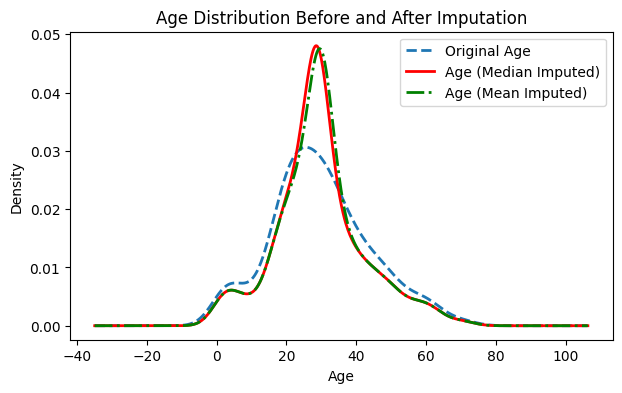

In [79]:
fig, ax = plt.subplots(figsize=(7,4))

# Plot KDE for original variable 
X_train['Age'].plot(kind='kde', ax=ax, label="Original Age", linestyle="--", linewidth=2)

# Plot KDE for variable imputed with the median
X_train['median_age'].plot(kind='kde', ax=ax, color='red', label="Age (Median Imputed)", linestyle="-", linewidth=2)

# Plot KDE for variable imputed with the mean
X_train['mean_age'].plot(kind='kde', ax=ax, color='green', label="Age (Mean Imputed)", linestyle="-.", linewidth=2)

# Add labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Density")
ax.set_title("Age Distribution Before and After Imputation")

# Add legend
ax.legend()

# Show plot
plt.show()

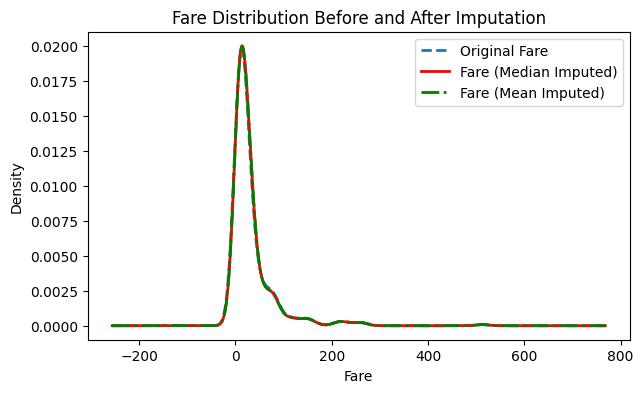

In [80]:
fig, ax = plt.subplots(figsize=(7,4))

# Plot KDE for original variable 
X_train['Fare'].plot(kind='kde', ax=ax, label="Original Fare", linestyle="--", linewidth=2)

# Plot KDE for variable imputed with the median
X_train['median_fare'].plot(kind='kde', ax=ax, color='red', label="Fare (Median Imputed)", linestyle="-", linewidth=2)

# Plot KDE for variable imputed with the mean
X_train['mean_fare'].plot(kind='kde', ax=ax, color='green', label="Fare (Mean Imputed)", linestyle="-.", linewidth=2)

# Add labels and title
ax.set_xlabel("Fare")
ax.set_ylabel("Density")
ax.set_title("Fare Distribution Before and After Imputation")

# Add legend
ax.legend()

# Show plot
plt.show()

In [81]:
X_train.cov()

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.280487,66.383530
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.404484,16.399278
median_age,204.349513,57.957599,-5.112563,161.989566,161.812625,54.710043,54.793876
mean_age,204.349513,55.603719,-5.146106,161.812625,161.812625,52.483705,52.565299
median_fare,66.280487,2448.197914,16.404484,54.710043,52.483705,2324.957614,2324.765012
mean_fare,66.383530,2448.197914,16.399278,54.793876,52.565299,2324.765012,2324.623997


In [82]:
X_train.corr()

,Age,Fare,Family,median_age,mean_age,median_fare,mean_fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.089604,0.089754
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205710,0.205660
median_age,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089149,0.089292
mean_age,1.000000,0.088069,-0.244610,0.999454,1.000000,0.085568,0.085707
median_fare,0.089604,1.000000,0.205710,0.089149,0.085568,1.000000,0.999989
mean_fare,0.089754,1.000000,0.205660,0.089292,0.085707,0.999989,1.000000


<Axes: >

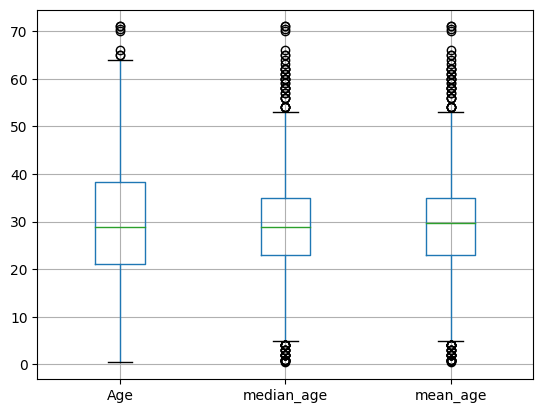

In [83]:
X_train[['Age', 'median_age', 'mean_age']].boxplot()

<Axes: >

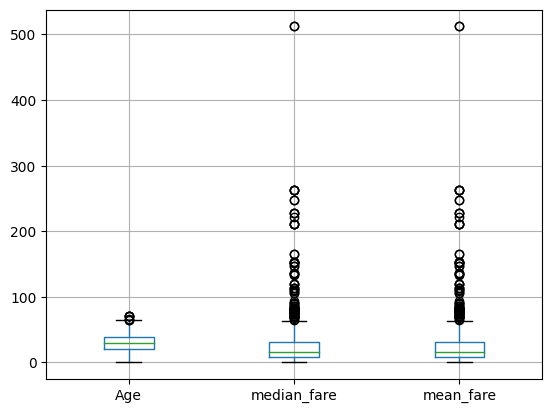

In [84]:
X_train[['Age', 'median_fare', 'mean_fare']].boxplot()

## Using Sklearn

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [86]:
imputer1 =SimpleImputer(strategy='median')
imputer2 =SimpleImputer(strategy='mean')

In [87]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [88]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [89]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [90]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [91]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [92]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])